# Data Analysis and Classic Machine Learning Techniques
***
# Table of Contents
1.   [Imports](#Imports)
2.   [Loading The Dataset](#Loading-The-Dataset)
3.   [Data Analysis](#Data-Analysis)
4.   [Data Pre-Processing](#Data-Pre-Processing)
4.   [Different Model Comparison](#Different-Model-Comparison)
5.   [Support Vector Machine](#Support-Vector-Machine)


# Imports

The necessary libraries are imported at this stage.

* pandas - Dataframe object is useful for data processing and analyses.
* sklearn - Provides a number of models, metrics and general functionality for machine learning.
* matplotlib - Provides plotting.

In [1]:
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import itertools
import numpy as np
#from google.colab import drive #Only needed on Colab
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, fbeta_score, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split
# Pretty display for notebooks
%matplotlib inline

# Loading The Dataset

In this section we load the dataset first from a single file.

Using **sklearn** functions, this dataset is split into the training and testing data, which are then exported as CSV files.

In [18]:
#mount drive
#drive.mount("/content/drive")
#path_to_data = "" #"drive/MyDrive/Kaggle/"

all_data = pd.read_csv("Our Datasets/" + "all data.csv", encoding="utf-8")
display(all_data.head(n=1))
#train = pd.read_csv(path_to_data + "train - OG.csv")
#test = pd.read_csv(path_to_data + "test.csv")

#Check it loaded ok
#display(train.head(n=1))
#display(test.head(n=1))

,Label,fBodyAcc-X-energy(),fBodyAcc-X-entropy(),fBodyAcc-X-iqr(),fBodyAcc-X-kurtosis,fBodyAcc-X-mad(),fBodyAcc-X-max(),fBodyAcc-X-maxInds,fBodyAcc-X-mean(),fBodyAcc-X-min(),...,tGravityAcc-Z-std(),tGravityAcc-sma(),tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-std()
0,DRIVING,34102.078766,4.406613,13.644394,1.214003,6.55364,48.215444,5.859375,11.819651,0.331383,...,0.689405,9.490107,11437.980504,4.844183,0.055572,0.028021,9.52147,9.490107,9.45153,0.026576


In [19]:
y = all_data.Label
X = all_data.drop('Label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2) #Splits 80% for training, 20% for testing

print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)

print("\ny_train:\n")
print(y_train.head())
print(y_train.shape)

print("\ny_test:\n")
print(y_test.head())
print(y_test.shape)


X_train:

      fBodyAcc-X-energy()  fBodyAcc-X-entropy()  fBodyAcc-X-iqr()  \
1919            10.908063              4.105128          0.186068   
104           9039.668251              3.976926          2.878426   
1979           405.815722              4.250256          1.676001   
2070            29.749236              4.410227          0.468700   
1737          2020.762964              3.973441          1.792127   

      fBodyAcc-X-kurtosis  fBodyAcc-X-mad()  fBodyAcc-X-max()  \
1919            11.172632          0.053154          1.444692   
104              8.996587          1.325425         38.144596   
1979             0.345638          0.313110          5.113486   
2070             0.253778          0.219016          1.343549   
1737            18.491730          0.253456         22.671539   

      fBodyAcc-X-maxInds  fBodyAcc-X-mean()  fBodyAcc-X-min()  \
1919            3.515625           0.163450          0.005989   
104             2.343750           4.301446          

# Data Analysis

In this section analysis over the data is done to determine the processing steps necessary for the [next section](#Data-Pre-Processing).

## Check for Common Elements

The training and test data are merged using inner join to see if there is any overlapping data. The output is an empty data frame - containing only the list of different features - meaning that there are no intersections between the two.

In [20]:
merged = pd.merge(X_train, X_test, how='inner')
print(merged)

Empty DataFrame
Columns: [fBodyAcc-X-energy(), fBodyAcc-X-entropy(), fBodyAcc-X-iqr(), fBodyAcc-X-kurtosis, fBodyAcc-X-mad(), fBodyAcc-X-max(), fBodyAcc-X-maxInds, fBodyAcc-X-mean(), fBodyAcc-X-min(), fBodyAcc-X-skewness, fBodyAcc-X-std(), fBodyAcc-Y-energy(), fBodyAcc-Y-entropy(), fBodyAcc-Y-iqr(), fBodyAcc-Y-kurtosis, fBodyAcc-Y-mad(), fBodyAcc-Y-max(), fBodyAcc-Y-maxInds, fBodyAcc-Y-mean(), fBodyAcc-Y-min(), fBodyAcc-Y-skewness, fBodyAcc-Y-std(), fBodyAcc-Z-energy(), fBodyAcc-Z-entropy(), fBodyAcc-Z-iqr(), fBodyAcc-Z-kurtosis, fBodyAcc-Z-mad(), fBodyAcc-Z-max(), fBodyAcc-Z-maxInds, fBodyAcc-Z-mean(), fBodyAcc-Z-min(), fBodyAcc-Z-skewness, fBodyAcc-Z-std(), fBodyAcc-sma(), fBodyAccJerk-X-energy(), fBodyAccJerk-X-entropy(), fBodyAccJerk-X-iqr(), fBodyAccJerk-X-kurtosis, fBodyAccJerk-X-mad(), fBodyAccJerk-X-max(), fBodyAccJerk-X-maxInds, fBodyAccJerk-X-mean(), fBodyAccJerk-X-min(), fBodyAccJerk-X-skewness, fBodyAccJerk-X-std(), fBodyAccJerk-Y-energy(), fBodyAccJerk-Y-entropy(), fBodyAc

## Shuffle the data

In [21]:
X_train = shuffle(X_train)
X_test = shuffle(X_test)

## Check for null values in rows

In [22]:
print("Any missing sample in training set:", X_train.isnull().values.any())
print("Any missing sample in test set:", X_test.isnull().values.any(), "\n")

Any missing sample in training set: False
Any missing sample in test set: False 



## Label Distribution

### Label Distribution in a Pie Chart

In [28]:
# Visualizing Activity Distribution
temp = y_train.iloc[2].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

AttributeError: 'str' object has no attribute 'value_counts'

### Label Distribution in a Column Format

In [29]:
train_outcome = pd.crosstab(index=y_train["Label"],
                              columns="count")

train_outcome

KeyError: 'Label'

# Data Pre-Processing

The dataset only requires a small number of pre-processing mainly, splitting the sets into X and y variables, categorical
variable encoding (for the label), and scaling.

The *activity* and *subject* columns are removed from the training and test data. **Y_train_label** and **Y_test_label** are the classifications of the activity of each row in the respective dataframes.

In [31]:
#X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
y_train_label = y_train.Activity.values.astype(object)
#X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
y_test_label = y_test.Activity.values.astype(object)

print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# Transforming non numerical labels into numerical labels
encoder = preprocessing.LabelEncoder()

# encoding train labels
encoder.fit(y_train_label)
y_train = encoder.transform(y_train_label)

# encoding test labels
encoder.fit(y_test_label)
y_test = encoder.transform(y_test_label)

#Total Number of Continuous features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of Continuous Features:",num_cols.size)

#names_of_predictors = list(X_train.columns.values) #Names of each feature

# Scaling the Train and Test feature set
# Because - values and classification
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #fit_transform is performed on training data
X_test_scaled = scaler.transform(X_test) #transform is performed on test data

AttributeError: 'Series' object has no attribute 'Activity'

# Different Model Comparison

In this step we compare 3 classic ml models.

In [9]:
clf_A = GaussianNB()
clf_B = AdaBoostClassifier(random_state=0)
clf_C = SVC(random_state=0)

learners = {}
learners["Gaussian Naive Bayes"] = clf_A
learners["AdaBoost"] = clf_B
learners["Support Vector Machine"] = clf_C

def train_predict(learners, X_train, y_train, X_test, y_test):
    for learner in learners:
        print("Learner:", learner,"\n------")
        print("Training Data")
        start = time()
        learners[learner].fit(X_train, y_train)
        end = time()
        print("Time taken:", end-start, "seconds")

        print("Testing Data")
        start = time()
        predictions_test = learners[learner].predict(X_test)
        end = time()
        print("Time taken:", end-start, "seconds")


        print("\nAccuracy Score")
        print(accuracy_score(y_test,predictions_test))

        print("\nBeta Score")
        print(fbeta_score(y_test,predictions_test,beta=0.5,average='weighted'))

        print("\nPrecision Score")
        print(precision_score(y_test, predictions_test, average='weighted'))

        print("\nRecall Score")
        print(recall_score(y_test, predictions_test, average='weighted'),'\n')

train_predict(learners, X_train_scaled, Y_train, X_test_scaled, Y_test)

Learner: Gaussian Naive Bayes 
------
Training Data
Time taken: 0.08783650398254395 seconds
Testing Data
Time taken: 0.09599781036376953 seconds

Accuracy Score
0.7702748557855447

Beta Score
0.7802673518256884

Precision Score
0.7946833707399261

Recall Score
0.7702748557855447 

Learner: AdaBoost 
------
Training Data
Time taken: 19.05275797843933 seconds
Testing Data
Time taken: 0.07099056243896484 seconds

Accuracy Score
0.5310485239226331

Beta Score
0.35512687797924963

Precision Score
0.33628556107901597

Recall Score
0.5310485239226331 

Learner: Support Vector Machine 
------
Training Data
Time taken: 6.97590708732605 seconds
Testing Data
Time taken: 4.350911617279053 seconds

Accuracy Score
0.9518154054971157

Beta Score
0.9519494451924377

Precision Score
0.9522363133649081

Recall Score
0.9518154054971157 



c:\users\aiden williams\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\aiden williams\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


As can be seen from the above metrics, SVM is quite clearly the most accurate classifier of the three, and it is for that reason that we will use it as one of the main classifiers for the group practical task

# Support Vector Classifier

There are a number of different parameters we can apply to SVC in order to obtain the best results possible. These different parameters were passed through a Grid Search model, which applies all of them to train various SVCs.

In [10]:
clf = SVC(random_state=0)

parameters =    {
                "kernel": ['poly', 'rbf', 'sigmoid'],
                "C": [50, 10, 1.0, 0.1, 0.01],
                "gamma": ['scale']
                }

scorer = make_scorer(fbeta_score, beta=0.5,average='weighted')
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train_scaled,Y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
clf.fit(X_train_scaled, Y_train)
# Make predictions using the unoptimized and model
predictions = clf.predict(X_test)
best_predictions = best_clf.predict(X_test_scaled)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test, predictions)))
print("F-score on the testing data: {:.4f}".format(fbeta_score(Y_test, predictions, beta = 0.5,average='weighted')))
print("Precision score on the testing data: {:.4f}".format(precision_score(Y_test, predictions, average='weighted')))
print("Recall score on the testing data: {:.4f}".format(recall_score(Y_test, predictions, average='weighted')))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test, best_predictions, beta = 0.5,average='weighted')))
print("Final precision score on the testing data: {:.4f}".format(precision_score(Y_test, best_predictions, average='weighted')))
print("Final recall score on the testing data: {:.4f}".format(recall_score(Y_test, best_predictions, average='weighted')))

c:\users\aiden williams\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\aiden williams\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\aiden williams\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\aiden williams\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWar

Unoptimized model
------
Accuracy score on the testing data: 0.3081
F-score on the testing data: 0.1388
Precision score on the testing data: 0.3362
Recall score on the testing data: 0.3081

Optimized Model
------
Final accuracy score on the testing data: 0.9562
Final F-score on the testing data: 0.9565
Final precision score on the testing data: 0.9570
Final recall score on the testing data: 0.9562


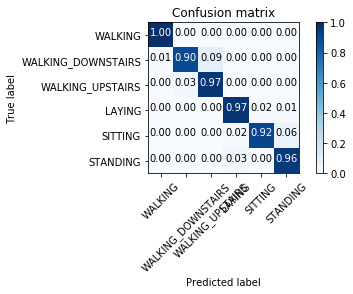

In [13]:
#Confusion Matrix maps out the predicted label given to the data with the actual label
#Helps us check the rate of true/false positives and true/false negatives
#parameters are the true labels, and the predicted labels

# https://sklearn.org/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cnf_matrix = confusion_matrix(Y_test, best_predictions)
np.set_printoptions(precision=2)

classes =    {
                        "WALKING":0,
                        "WALKING_DOWNSTAIRS":1,
                        "WALKING_UPSTAIRS":2,
                        "LAYING":3,
                        "SITTING":4,
                        "STANDING":5
                    }

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,title='Confusion matrix')


In [12]:
print("The best parameters were:", grid_fit.best_params_)


The best parameters were: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
